Importamos los paquetes necesarios

In [1]:
import cv2  
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw, ImageFont

TAREA: Realiza la cuenta de píxeles blancos por filas (en lugar de por columnas). Determina el valor máximo de píxeles blancos para filas, maxfil, mostrando el número de filas y sus respectivas posiciones, con un número de píxeles blancos mayor o igual que 0.90*maxfil.

Numero maximo de pixeles blancos en una fila: 57885
Numero de filas por encima del umbral 3


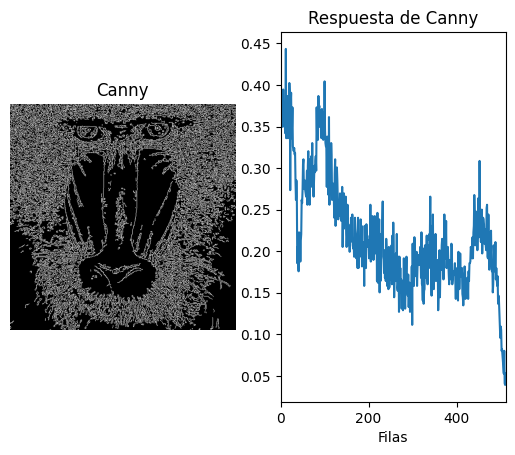

In [8]:
img = cv2.imread('mandril.jpg')  #  Lee la imagen
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
gris = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # Convierte a escala de grises
canny = cv2.Canny(gris, 100, 200) # Aplica Canny

#Cuenta el número de píxeles blancos (255) por fila
#Suma los valores de los pixeles por fila
row_counts = cv2.reduce(canny, 1, cv2.REDUCE_SUM, dtype=cv2.CV_32SC1)
max_row = np.max(row_counts)
print("Numero maximo de pixeles blancos en una fila:", max_row)

#Normaliza en base al número de filas, primer valor devuelto por shape, y al valor máximo del píxel (255)
#El resultado será el número de píxeles blancos por fila
row = row_counts[:,0] / (255 * canny.shape[1])

umbral = 0.9 * max_row
filas_above_threshold = np.sum(row_counts >= umbral)
print("Numero de filas por encima del umbral", filas_above_threshold)

#Muestra dicha cuenta gráficamente
plt.figure()
plt.subplot(1, 2, 1)
plt.axis("off")
plt.title("Canny")
plt.imshow(canny, cmap='gray')


plt.subplot(1, 2, 2)
plt.title("Respuesta de Canny")
plt.xlabel("Filas")
plt.ylabel("% píxeles")
plt.plot(row)
#Rango en x definido por las filas
plt.xlim([0, canny.shape[0]])
plt.show()

TAREA: Aplica umbralizado a la imagen resultante de Sobel (convertida a 8 bits), y posteriormente realiza el conteo por filas y columnas similar al realizado en el ejemplo con la salida de Canny de píxeles no nulos. Calcula el valor máximo de la cuenta por filas y columnas, y determina las filas y columnas por encima del 0.90*máximo. Remarca con alguna primitiva gráfica dichas filas y columnas sobre la imagen del mandril. ¿Cómo se comparan los resultados obtenidos a partir de Sobel y Canny?

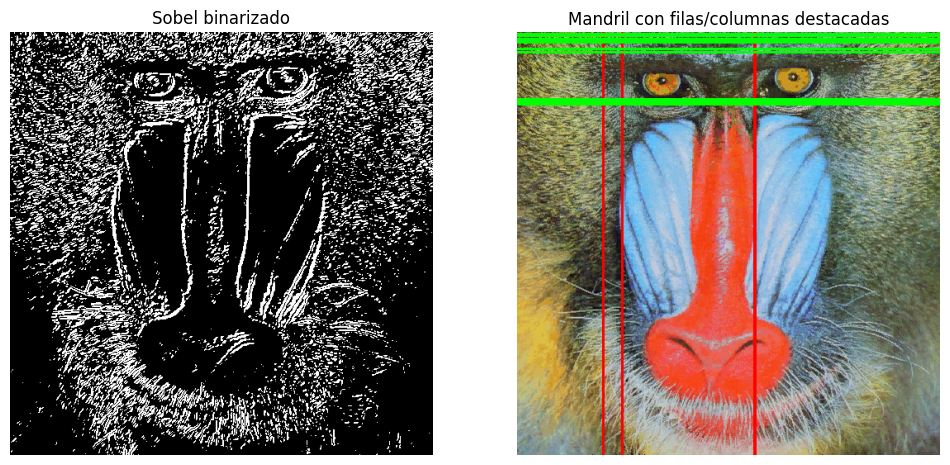

Filas por encima de 0.9*max: [ 2  3  4  8 11 12 20 24 81 82 83 84 87]
Columnas por encima de 0.9*max: [104 127 287 288]


In [9]:
# Gaussiana para suavizar la imagen original, eliminando altas frecuencias
ggris = cv2.GaussianBlur(gris, (3, 3), 0)

#Calcula en ambas direcciones (horizontal y vertical)
sobelx = cv2.Sobel(ggris, cv2.CV_64F, 1, 0)  # x
sobely = cv2.Sobel(ggris, cv2.CV_64F, 0, 1)  # y
#Combina ambos resultados
sobel = cv2.add(sobelx, sobely)

# Convierte la imagen de Sobel a 8 bits
sobel8 = cv2.convertScaleAbs(sobel)

# Aplica umbralizado a la imagen de Sobel
umbral_sobel = 100  # Puedes ajustar este valor
_, sobel_bin = cv2.threshold(sobel8, umbral_sobel, 255, cv2.THRESH_BINARY)

# Cuenta píxeles blancos por filas y columnas
col_counts_sobel = cv2.reduce(sobel_bin, 0, cv2.REDUCE_SUM, dtype=cv2.CV_32SC1)[0]
row_counts_sobel = cv2.reduce(sobel_bin, 1, cv2.REDUCE_SUM, dtype=cv2.CV_32SC1)[:,0]

# Normaliza
cols_sobel = col_counts_sobel / (255 * sobel_bin.shape[0])
rows_sobel = row_counts_sobel / (255 * sobel_bin.shape[1])

# Calcula máximos
max_col = np.max(col_counts_sobel)
max_row = np.max(row_counts_sobel)

# Umbral para destacar filas/columnas
th_col = 0.9 * max_col
th_row = 0.9 * max_row

cols_above = np.where(col_counts_sobel >= th_col)[0]
rows_above = np.where(row_counts_sobel >= th_row)[0]

# Dibuja líneas sobre la imagen original
img_marked = img.copy()
for c in cols_above:
    cv2.line(img_marked, (c, 0), (c, img_marked.shape[0]-1), (255, 0, 0), 2)
for r in rows_above:
    cv2.line(img_marked, (0, r), (img_marked.shape[1]-1, r), (0, 255, 0), 2)

# Muestra resultados
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Sobel binarizado")
plt.axis("off")
plt.imshow(sobel_bin, cmap='gray')

plt.subplot(1,2,2)
plt.title("Mandril con filas/columnas destacadas")
plt.axis("off")
plt.imshow(img_marked)
plt.show()

print(f"Filas por encima de 0.9*max: {rows_above}")
print(f"Columnas por encima de 0.9*max: {cols_above}")


TAREA: Proponer un demostrador que capture las imágenes de la cámara, y les permita exhibir lo aprendido en estas dos prácticas ante quienes no cursen la asignatura :). Es por ello que además de poder mostrar la imagen original de la webcam, permita cambiar de modo, incluyendo al menos dos procesamientos diferentes como resultado de aplicar las funciones de OpenCV trabajadas hasta ahora.


In [1]:
import cv2
import numpy as np

def mostrar_menu():
    print("\n=== DEMOSTRADOR DE MODOS ===")
    print("0 - Original")
    print("1 - Escala de grises")
    print("2 - Detección de bordes (Canny)")
    print("3 - Gradiente Sobel")
    print("4 - Umbralización binaria")
    print("5 - Pop Art Mosaico")
    print("q - Salir")

# Inicializa la cámara
vid = cv2.VideoCapture(0)
modo = 0

# Paleta de colores Pop Art
pop_colors = [
    (255, 0, 0),
    (0, 255, 0),
    (0, 0, 255),
    (255, 255, 0),
    (255, 0, 255),
    (0, 255, 255),
    (255, 128, 0),
    (128, 0, 255)
]
block_size = 5

mostrar_menu()

while True:
    ret, frame = vid.read()
    if not ret:
        print("No se pudo capturar imagen")
        break

    # Procesamiento según modo
    if modo == 0:
        salida = frame.copy()
    elif modo == 1:
        salida = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    elif modo == 2:
        gris = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        salida = cv2.Canny(gris, 100, 200)
    elif modo == 3:
        gris = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        ggris = cv2.GaussianBlur(gris, (3, 3), 0)
        sobelx = cv2.Sobel(ggris, cv2.CV_64F, 1, 0)
        sobely = cv2.Sobel(ggris, cv2.CV_64F, 0, 1)
        sobel = cv2.add(sobelx, sobely)
        salida = cv2.convertScaleAbs(sobel)
    elif modo == 4:
        gris = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        _, salida = cv2.threshold(gris, 130, 255, cv2.THRESH_BINARY)
    elif modo == 5:
        # Pop Art Mosaico
        h, w, _ = frame.shape
        h2, w2 = h - h % block_size, w - w % block_size
        frame_cropped = frame[:h2, :w2]

        pop_frame = np.zeros_like(frame_cropped)
        gray = cv2.cvtColor(frame_cropped, cv2.COLOR_BGR2GRAY)

        for i in range(0, h2, block_size):
            for j in range(0, w2, block_size):
                block = gray[i:i+block_size, j:j+block_size]
                mean_intensity = np.mean(block)
                color_idx = int((mean_intensity / 255) * (len(pop_colors)-1))
                color = pop_colors[color_idx]
                pop_frame[i:i+block_size, j:j+block_size] = color

        salida = pop_frame
    else:
        salida = frame.copy()

    # Muestra la imagen
    ventana = f"Demostrador - Modo {modo}"
    cv2.imshow(ventana, salida)

    # Espera tecla
    key = cv2.waitKey(20) & 0xFF
    if key == ord('q'):
        break
    elif key in [ord(str(i)) for i in range(6)]:  # ahora incluye el 5
        modo = int(chr(key))
        cv2.destroyAllWindows()
        mostrar_menu()

# Libera recursos
vid.release()
cv2.destroyAllWindows()



=== DEMOSTRADOR DE MODOS ===
0 - Original
1 - Escala de grises
2 - Detección de bordes (Canny)
3 - Gradiente Sobel
4 - Umbralización binaria
5 - Pop Art Mosaico
q - Salir

=== DEMOSTRADOR DE MODOS ===
0 - Original
1 - Escala de grises
2 - Detección de bordes (Canny)
3 - Gradiente Sobel
4 - Umbralización binaria
5 - Pop Art Mosaico
q - Salir

=== DEMOSTRADOR DE MODOS ===
0 - Original
1 - Escala de grises
2 - Detección de bordes (Canny)
3 - Gradiente Sobel
4 - Umbralización binaria
5 - Pop Art Mosaico
q - Salir

=== DEMOSTRADOR DE MODOS ===
0 - Original
1 - Escala de grises
2 - Detección de bordes (Canny)
3 - Gradiente Sobel
4 - Umbralización binaria
5 - Pop Art Mosaico
q - Salir

=== DEMOSTRADOR DE MODOS ===
0 - Original
1 - Escala de grises
2 - Detección de bordes (Canny)
3 - Gradiente Sobel
4 - Umbralización binaria
5 - Pop Art Mosaico
q - Salir

=== DEMOSTRADOR DE MODOS ===
0 - Original
1 - Escala de grises
2 - Detección de bordes (Canny)
3 - Gradiente Sobel
4 - Umbralización binari

TAREA: Tras ver los vídeos [My little piece of privacy](https://www.niklasroy.com/project/88/my-little-piece-of-privacy), [Messa di voce](https://youtu.be/GfoqiyB1ndE?feature=shared) y [Virtual air guitar](https://youtu.be/FIAmyoEpV5c?feature=shared) proponer un demostrador reinterpretando la parte de procesamiento de la imagen, tomando como punto de partida alguna de dichas instalaciones.

In [6]:
import cv2
import numpy as np

def detectar_circulos_precisos(frame, lower, upper, color_bgr):
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    mask = cv2.inRange(hsv, lower, upper)

    # Mejorar máscara (menos ruido, bordes más suaves)
    mask = cv2.GaussianBlur(mask, (7, 7), 2)
    kernel = np.ones((5, 5), np.uint8)
    mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)

    # Buscar contornos
    contornos, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    for cnt in contornos:
        (x, y), radio = cv2.minEnclosingCircle(cnt)
        centro = (int(x), int(y))
        radio = int(radio)

        if radio > 15:  # ignorar manchas pequeñas
            area_contorno = cv2.contourArea(cnt)
            area_circulo = np.pi * (radio ** 2)

            if area_circulo > 0:
                relacion = area_contorno / area_circulo
                # tolerancia más amplia para "círculos"
                if 0.5 < relacion < 1.3:
                    cv2.circle(frame, centro, radio, color_bgr, 3)
                    cv2.circle(frame, centro, 3, (255, 255, 255), -1)  # centro blanco

    return frame, mask


# --- Captura cámara ---
cap = cv2.VideoCapture(0)

# Rango HSV para naranja (ajusta según tu luz)
naranja_bajo = np.array([10, 120, 120])
naranja_alto = np.array([25, 255, 255])

while True:
    ret, frame = cap.read()
    if not ret:
        break

    frame = cv2.resize(frame, (640, 480))

    # Detectar círculos naranjas
    frame_detectado, mask = detectar_circulos_precisos(frame, naranja_bajo, naranja_alto, (0, 140, 255))

    # Mostrar ventanas
    cv2.imshow("Camara - Circulos Naranjas", frame_detectado)
    cv2.imshow("Mascara Naranja", mask)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()
